In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os


from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.pitch import Pitch
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen, urlretrieve
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [40]:
sb.matches(competition_id=53, season_id=106)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2022-09-12T15:04:12.439476,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
1,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2022-09-06T06:29:30.151649,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2
2,3835335,2022-07-15,21:00:00.000,Europe - UEFA Women's Euro,2022,Northern Ireland,England Women's,0,5,available,...,2022-08-25T15:50:02.843890,3,Group Stage,St. Mary''s Stadium,Esther Staubli,Kenny Shiels,Sarina Glotzbach-Wiegman,1.1.0,2,2
3,3835323,2022-07-09,18:00:00.000,Europe - UEFA Women's Euro,2022,Portugal Women's,Switzerland Women's,2,2,available,...,2022-08-29T19:19:33.588699,1,Group Stage,Leigh Sports Village Stadium,Jana Adamkova,Francisco Miguel Conceição Roque Neto,Nils Herbert Kromann Nielsen,1.1.0,2,2
4,3835325,2022-07-10,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Italy Women's,5,1,available,...,2022-09-04T19:01:10.410332,1,Group Stage,AESSEAL New York Stadium,Rebecca Welch,Corinne Catherine Diacre,Milena Bertolini,1.1.0,2,2
5,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2022-08-29T19:17:00.202011,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
6,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2022-08-25T19:03:09.037945,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
7,3835320,2022-07-07,21:00:00.000,Europe - UEFA Women's Euro,2022,Norway Women's,Northern Ireland,4,1,available,...,2022-08-25T10:44:36.086663,1,Group Stage,St. Mary''s Stadium,Lina Lehtovaara,Martin Sjögren,Kenny Shiels,1.1.0,2,2
8,3845507,2022-07-27,21:00:00.000,Europe - UEFA Women's Euro,2022,Germany Women's,France Women's,2,1,available,...,2022-08-25T21:30:18.952432,5,Semi-finals,Stadium MK,Cheryl Foster,Martina Voss-Tecklenburg,Corinne Catherine Diacre,1.1.0,2,2
9,3844387,2022-07-23,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Netherlands Women's,1,0,available,...,2022-08-29T20:59:06.480438,4,Quarter-finals,AESSEAL New York Stadium,Ivana Martinčić,Corinne Catherine Diacre,Mark Richard David Parsons,1.1.0,2,2


In [2]:
parser = Sbopen()
match_files = [3845506]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [4]:
sb.lineups(match_id=3845506)

{"Sweden Women's":     player_id                    player_name player_nickname  jersey_number  \
 0        4633       Magdalena Lilly Eriksson            None              6   
 1        4640             Rut Hedvig Lindahl  Hedvig Lindahl              1   
 2       10215                Fridolina Rolfö            None             18   
 3       10220               Kosovare Asllani            None              9   
 4       10222  Jonna Ann-Charlotte Andersson            None              2   
 5       10224            Sara Caroline Seger            None             17   
 6       10229        Emma Stina Blackstenius            None             11   
 7       10230        Linda Brigitta Sembrant  Linda Sembrant              3   
 8       13881            Eva Sofia Jakobsson            None             10   
 9       21023                  Amanda Nildén            None              5   
 10      24693         Hanna Erica Maria Glas            None              4   
 11      25697        

In [3]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#FFFFFF"
secondColor = "#C8102E"
ateamColor = "#FFCD00"
MVP_id = 15619
MVPname = "Beth Mead"
tournament = "Women's EURO 2022"
textColor = "black"
hteam = "England Women's"
ateam = "Sweden Women's"

pitchCmap = LinearSegmentedColormap.from_list("pitch heatmap", ["#7FB069",hteamColor], N=100)

In [4]:
Statsbomb = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Football\Womens Euro 2022\sb_text_logo.png")

In [5]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [6]:
passes = df[df.type_name == "Pass"]
passes = passes[passes.team_name == hteam]
passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!='Pass Offside') & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown")]

passes = passes[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                     "end_x","end_y","pass_goal_assist",'pass_shot_assist', "type_name"]]
passes = passes.reset_index()

In [7]:
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [8]:
progPasses = passes[passes["progressive"]==True]

In [9]:
assists = passes[passes["pass_goal_assist"]==True]

In [10]:
keyPasses = passes[passes["pass_shot_assist"]==True]

In [11]:
allEvents = df[df["team_name"]== hteam]
allEvents = allEvents[(allEvents["type_name"]!= 'Ball Receipt') & (allEvents["type_name"]!= 'Injury Stoppage') 
                            & (allEvents["type_name"]!= 'Player Off') & (allEvents["type_name"]!= 'Player On') 
                            & (allEvents["type_name"]!= 'Substitution') & (allEvents["type_name"]!= 'Miscontrol')
                      & (allEvents["type_name"]!= 'Shot') & (allEvents["type_name"]!= 'Dispossessed')]
allEvents = allEvents[(allEvents["outcome_name"]!="Incomplete") & (allEvents["outcome_name"]!="Blocked") 
                      & (allEvents["outcome_name"]!="Out") 
                    & (allEvents["outcome_name"]!="Lost Out") & (allEvents["outcome_name"]!="Lost In Play") 
                & (allEvents["outcome_name"]!="Unknown") & (allEvents["outcome_name"]!="Pass Offside")
                      & (allEvents["type_name"]!="Starting XI") & (allEvents["type_name"]!="Half Start")
                     & (allEvents["type_name"]!="Half End") & (allEvents["type_name"]!="Ball Receipt")]

allEvents = allEvents[[ 'player_name',"player_id", 'minute', 'second', 'x',"y", "type_name", 
                             "outcome_name"]]

In [12]:
allBallRecovery = allEvents[allEvents.type_name == 'Ball Recovery']

allInterception = allEvents[allEvents.type_name == 'Interception']


allDribble = allEvents[allEvents.type_name == 'Dribble']
allDribble = allDribble[allDribble.outcome_name == 'Complete']

allTackle = allEvents[allEvents.type_name == "Tackle"]

allClearance = allEvents[allEvents.type_name == "Clearance"]

allBlock = allEvents[allEvents.type_name == "Block"]

allDuel = allEvents[allEvents.type_name == "Duel"]
allDuel = allDuel[allDuel['outcome_name'].notna()]

In [13]:
passes["passer"] = passes["player_name"]
passes["recipient"] = passes["player_name"].shift(-1)

In [14]:
average_locations = passes.groupby("passer").agg({"x":["mean"], "y": ["mean", "count"]})
average_locations.columns = ["x","y", "count", ]
average_locations.sort_values(by="passer", ascending=True)

,x,y,count
passer,,,
Alessia Russo,76.766667,33.166667,9
Alex Greenwood,53.442857,6.728571,7
Bethany Mead,83.195000,51.140000,20
Chloe Kelly,63.900000,4.500000,1
Ella Toone,78.728571,27.142857,7
Ellen White,61.275000,25.975000,4
Francesca Kirby,75.172000,24.564000,25
Georgia Stanway,63.422581,48.958065,31
Jill Scott,63.275000,50.200000,4


In [16]:
def matchReport(player, save=False):
    tempAvgLoc = average_locations[average_locations.index == player]
    tempEvents = allEvents[allEvents["player_name"]==player]
    tempPasses = passes[passes["player_name"]== player]
    tempProg = progPasses[progPasses["player_name"]== player]
    tempAssist = assists[assists["player_name"]== player]
    tempKey = keyPasses[keyPasses["player_name"]== player]
    tempBC = allBallRecovery[allBallRecovery["player_name"]== player]
    tempClear = allClearance[allClearance["player_name"]== player]
    tempInter = allInterception[allInterception["player_name"]== player]
    tempBlock = allBlock[allBlock["player_name"]== player]
    tempDuel = allDuel[allDuel["player_name"]== player]
    
    counttempPasses = tempPasses.shape[0]
    counttempProg = tempProg.shape[0]
    counttempAssist = tempAssist.shape[0]
    counttempKey = tempKey.shape[0]
    counttempBC = tempBC.shape[0]
    counttempClear = tempClear.shape[0]
    counttempInter = tempInter.shape[0]
    counttempBlock = tempBlock.shape[0]
    counttempDuel = tempDuel.shape[0]
    
    pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
    fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
    fig.set_facecolor("lightgrey")
    
    axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    axs["title"].text (0.50, 0.01, f"Pass Map", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)


    HighlightText(x=.20, y=19,
                  s=f'<{hteam}> vs <{ateam}>', fontsize=30,
                  highlight_textprops=[{"color": hteamColor},
                                   {"color": ateamColor}])

    TITLE_STR1 = f'{player}s Match Report'
    title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')


    average_location = pitch.scatter(tempAvgLoc.x, tempAvgLoc.y,
                           s=300,
                           marker= "o", color=hteamColor, edgecolors=secondColor, linewidth=2, alpha=1,
                       ax=axs['pitch'][0], zorder=4)

    kde = pitch.kdeplot(tempEvents.x, tempEvents.y, ax=axs['pitch'][0],
                    fill=True, levels=100,
                    shade_lowest=False,
                    cut=4.1, thresh=.3,
                    cmap = pitchCmap)


    pitch.arrows(tempPasses.x, tempPasses.y,
             tempPasses.end_x, tempPasses.end_y, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label=f"Completed passes: {counttempPasses}")

    pitch.arrows(tempProg.x, tempProg.y,
             tempProg.end_x, tempProg.end_y, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Progressive Passes: {counttempProg}")

    pitch.arrows(tempAssist.x, tempAssist.y,
             tempAssist.end_x, tempAssist.end_y, width=2,
             headwidth=10, headlength=10, color="gold", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Assists: {counttempAssist}")
    
    pitch.arrows(tempKey.x, tempKey.y,
             tempKey.end_x, tempKey.end_y, width=2,
             headwidth=10, headlength=10, color="brown", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Key Passes: {counttempKey}")


    scatter_recovery = pitch.scatter(tempBC.x, tempBC.y, c= hteamColor, edgecolor = secondColor,
                                 s=120, marker='s',  ax=axs['pitch'][2], zorder=2, 
                                 label=f"Ball Recoveries: {counttempBC}")

    scatter_interception = pitch.scatter(tempInter.x, tempInter.y, c= hteamColor,
                                     s=200, marker='d', edgecolor = secondColor, ax=axs['pitch'][2], zorder=2, 
                                     label=f"Interceptions: {counttempInter}")

    scatter_duel = pitch.scatter(tempDuel.x, tempDuel.y, c=hteamColor, edgecolor= secondColor,
                               s=520, marker=".",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Duels Won: {counttempDuel}")

    scatter_Clearance = pitch.scatter(tempClear.x, tempClear.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="^",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Clearances: {counttempClear}")

    scatter_Block = pitch.scatter(tempBlock.x, tempBlock.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="h",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Blocks: {counttempBlock}")




    legend = axs['pitch'][1].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01), fancybox=True)
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_va('center')
    
    legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_va('center')

    sb_logo = fig.add_axes([0.38, 1.04, 0.25, 0.04])
    sb_logo.axis('off')
    sb_logo.imshow(Statsbomb)

    
    if save ==True:
        plt.savefig(f'viz/{player} Match Report vs {ateam}, {tournament}', dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [17]:
passes["player_name"].unique()

array(['Georgia Stanway', 'Keira Walsh', 'Mary Alexandra Earps',
       'Leah Williamson', 'Francesca Kirby', 'Lauren Hemp', 'Rachel Daly',
       'Millie Bright', 'Lucy Bronze', 'Bethany Mead', 'Ellen White',
       'Alessia Russo', 'Ella Toone', 'Alex Greenwood', 'Chloe Kelly',
       'Jill Scott'], dtype=object)

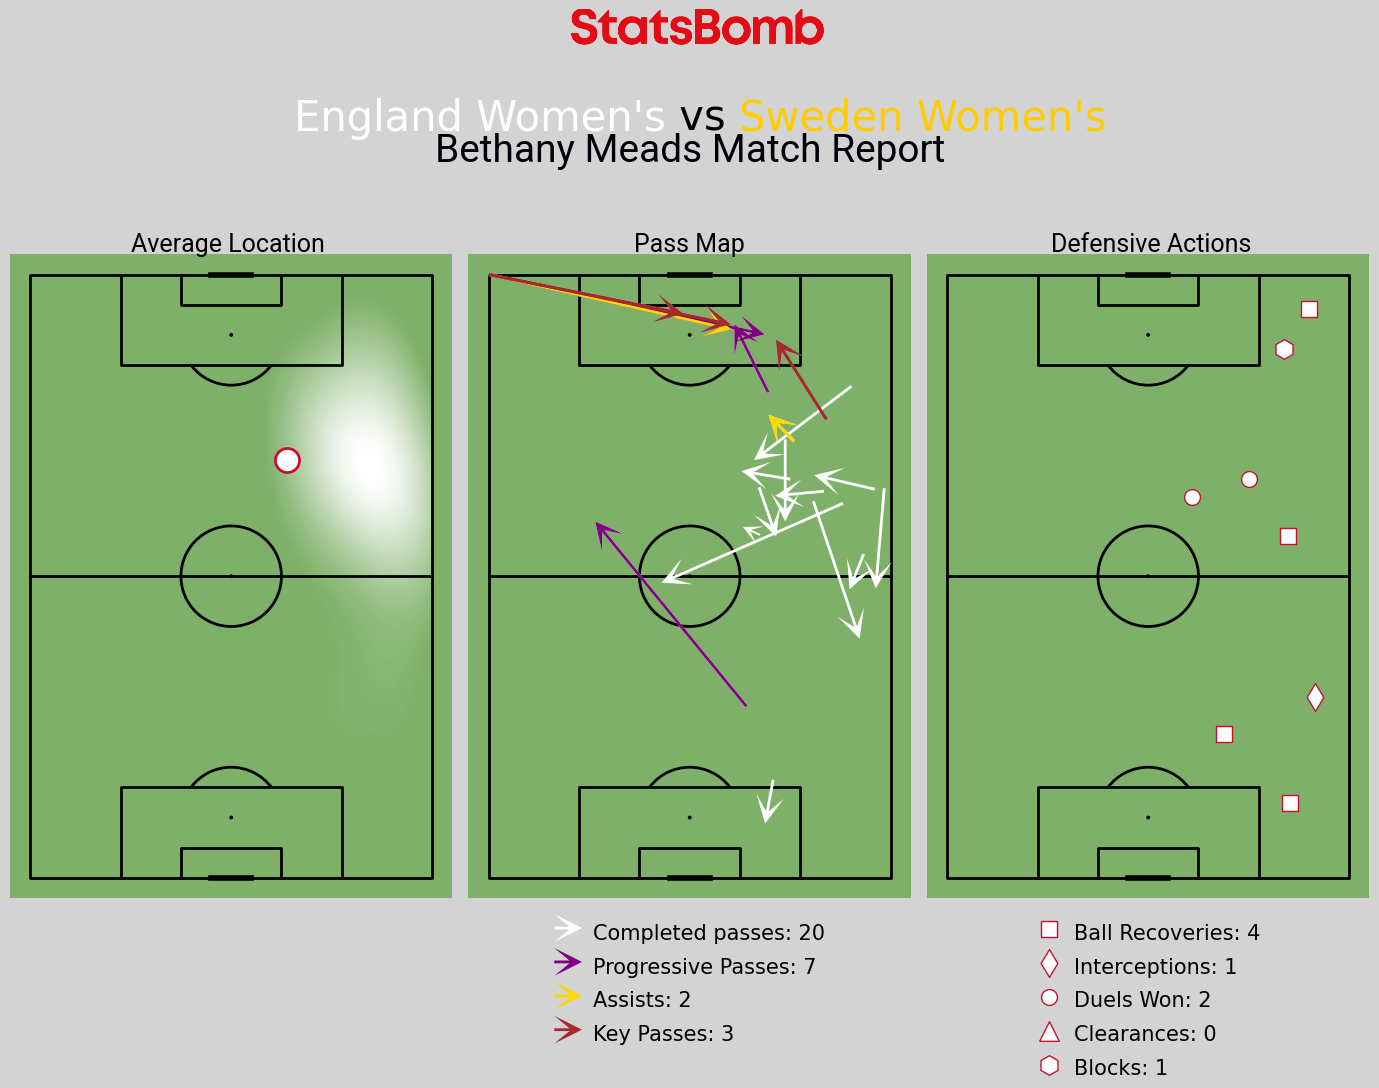

In [18]:
matchReport("Bethany Mead")